# Stage 09 — Homework Starter Notebook

In the lecture, we learned how to create engineered features. Now it’s your turn to apply those ideas to your own project data.

In [2]:
import pandas as pd
import numpy as np

# Example synthetic data (replace with your project dataset)
np.random.seed(0)
n = 100
df = pd.DataFrame({
    'income': np.random.normal(60000, 15000, n).astype(int),
    'monthly_spend': np.random.normal(2000, 600, n).astype(int),
    'credit_score': np.random.normal(680, 50, n).astype(int)
})
df.head()

,income,monthly_spend,credit_score
0,86460,3129,661
1,66002,1191,668
2,74681,1237,734
3,93613,2581,712
4,88013,1296,712


## TODO: Implement at least 2 engineered features here

<Axes: xlabel='income', ylabel='monthly_spend'>

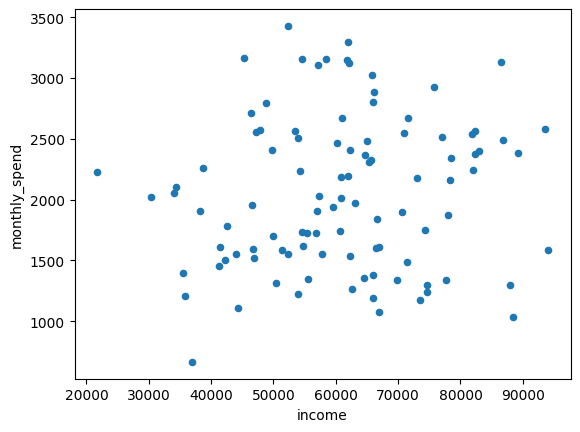

In [4]:
# Example template:
df['spend_income_ratio'] = df['monthly_spend'] / df['income']  # TODO: Your feature
# Add rationale in markdown below
df.plot.scatter(x='income', y='monthly_spend')

### Rationale for Feature 1
+ The `spend_income_ratio` feature shows how much of a person's income is spent each month. Our EDA found that people with similar incomes can have very different spending habits. This ratio helps the model spot those differences, making it easier to identify overspending or saving behaviors, which is useful for predicting financial risk.

<Axes: >

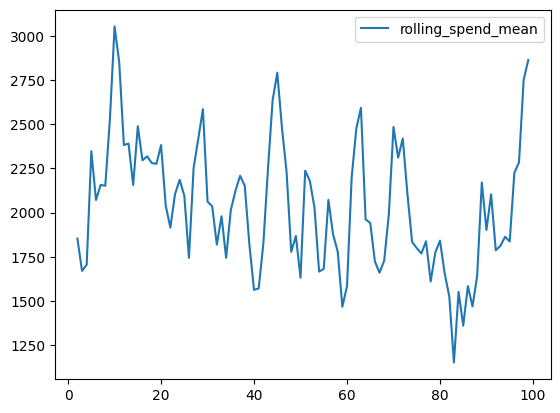

In [5]:
# TODO: Add another feature
df['rolling_spend_mean'] = df['monthly_spend'].rolling(3).mean()
df.plot.line(y='rolling_spend_mean')

### Rationale for Feature 2
The `rolling_spend_mean` feature captures recent spending trends by averaging monthly spend over the last three periods. This helps the model detect changes or spikes in spending behavior, which can be important for predicting future financial risk or instability, as seen in our EDA.

## optional plot & coretest correlation

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

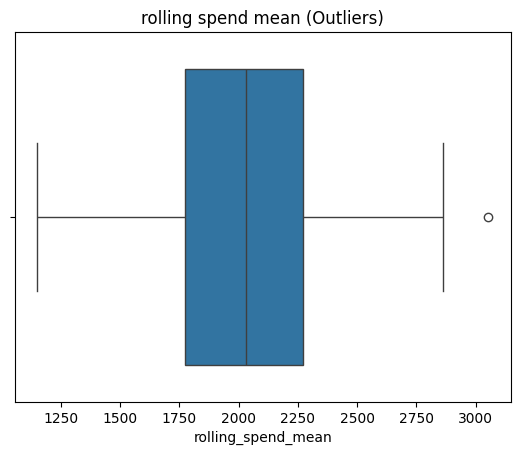

In [11]:
# TODO: boxplot for outliers
sns.boxplot(x=df['rolling_spend_mean'])
plt.title('rolling spend mean (Outliers)')
plt.show()

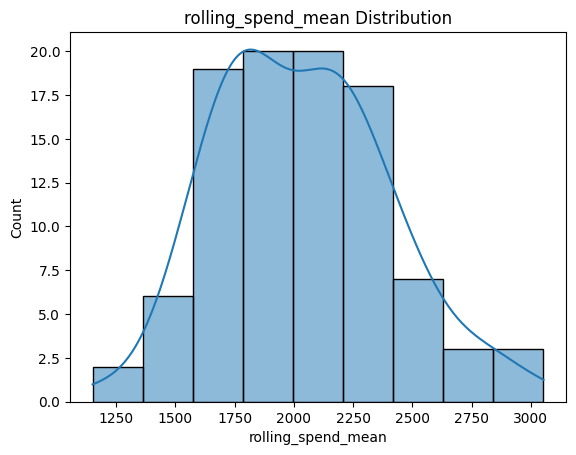

In [12]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['rolling_spend_mean'], kde=True)
plt.title('rolling_spend_mean Distribution')
plt.show()

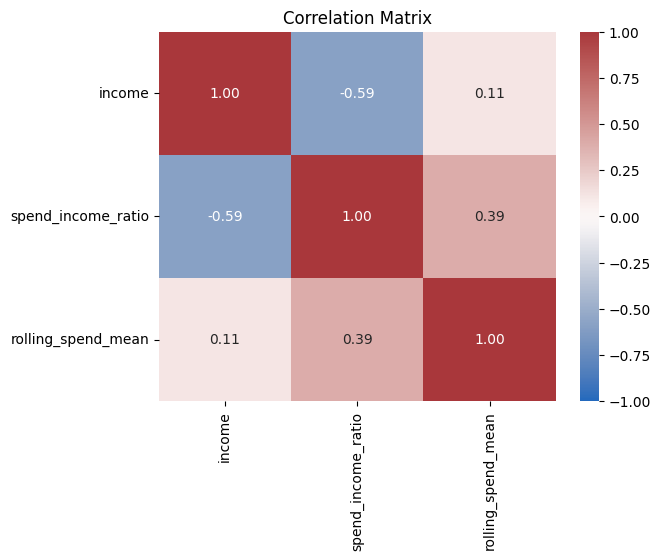

,income,spend_income_ratio,rolling_spend_mean
income,1.000000,-0.592318,0.113000
spend_income_ratio,-0.592318,1.000000,0.393896
rolling_spend_mean,0.113000,0.393896,1.000000


In [14]:
corr = df[['income','spend_income_ratio','rolling_spend_mean']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

### Expaination：
+ The correlation matrix helps us quickly see how our new features (`spend_income_ratio` and `rolling_spend_mean`) relate to income and to each other. This visualization makes it easier to spot strong relationships or redundancy between features, guiding us to select the most useful variables for modeling.